# Exercise 08

## DONE BY: JUAN CARLOS ERASO Y CARLOS QUISPE

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import zipfile


## Run The next Cell if Runing in Jupyter

In [0]:
#read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

## Run The next 2 Cells if Runing in CoLab 
choose the file with botton while running

In [1]:
#upload file to CoLab
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [6]:
import io

#READ in CoLab
tweets = pd.read_csv(io.StringIO(uploaded['Tweets.csv'].decode('utf-8')))
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
tweets.shape

(14640, 15)

### Proportion of tweets with each sentiment

In [8]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [9]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

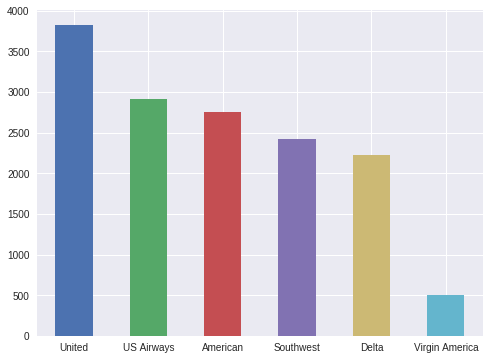

In [12]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)


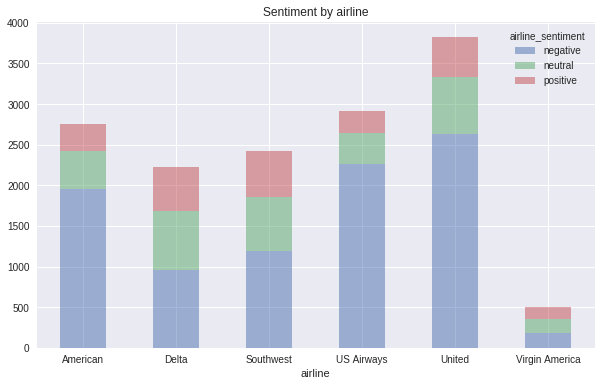

In [13]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [0]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [55]:
# define a function that accepts text and returns a list of lemmas
import nltk
nltk.download('wordnet') #Download package for using in CoLab
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

#Use CountVectorizer to create document-term matrices from X
vect = CountVectorizer(lowercase=False,#Does not convert characters to lowercase
                      ngram_range=(1, 3), # include n-grams 
                      stop_words='english',
                      max_features=100000,
                      analyzer=split_into_lemmas
                      )

vect_tfv = TfidfVectorizer()


X_dtm = vect.fit_transform(X)
print(X_dtm.shape)
X_tfv = vect_tfv.fit_transform(X)
print(X_tfv.shape)

[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
(14640, 26089)
(14640, 15051)


In [83]:
#RANDOM FOREST CLASSIFICATION 'COUNT VECTORIZER'
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#print
#clf
print('COUNT VECTORIZER')
print("Train Accuracy : ", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_test, clf.predict(X_test)))

#RANDOM FOREST CLASSIFICATION 'Tfidf VECTORIZER'

X_train, X_test, y_train, y_test = train_test_split(X_tfv, y, test_size=0.3)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#print
#clf
print('Tfidf VECTORIZER')
print("Train Accuracy : ", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy  : ", accuracy_score(y_test, clf.predict(X_test)))



COUNT VECTORIZER
Train Accuracy :  0.9837041373926619
Test Accuracy  :  0.7288251366120219
Tfidf VECTORIZER
Train Accuracy :  0.9794106167056986
Test Accuracy  :  0.7340619307832422


# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [104]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.optimizers import RMSprop
#from keras.callbacks import History
#from livelossplot import PlotLossesKeras
X_train.shape[1:]

(15051,)

In [108]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.000025),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1926656   
_________________________________________________________________
activation_13 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 1,928,458
Trainable params: 1,928,202
Non-trainable params: 256
________________________________________________________________

In [0]:
#TRAINING 2 EPOCHS
model.fit(X_train,y_train, epochs=2,validation_data=(X_test, y_test))

#TESTING
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])


In [0]:
#TRAINING 50 EPOCHS
model.fit(X_train,y_train, epochs=50,validation_data=(X_test, y_test))

#TESTING
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
